### Predator – Prey model

This model describes the dynamics of a biological systems with two species that interact, one as a prey ($X_1$) and the other as predator ($X_2$). The populations change through time according to the pair of equations:  

$$ {dX_1 \over dt} = {\mu (1-{X_1 \over K}) X_1 - h X_2 X_1 } $$  
$$ {dX_2 \over dt} = {\beta  h X_1 X_2 - m X_2} $$

$X_1$ = Prey &rarr;logistic growth with predation  
$X_2$ = Predator &rarr;exponential growth some mortality

μ = prey growth rate  
h = prey capture rate (the predator capturing the prey)  
β = conversion efficiency (from prey to energy for reproduction)  
m = predator mortality  
K = Carrying capacity   

#### Some important assumptions 
1. In the absence of predators, the prey population grows logistically.  
2. The population growth of the predator is limited only by the availability of the prey.
3. Both predator and prey reproduce continuously, have no age structure, and all individuals are identical.
4. The predation rate is proportional to the rate of encounter between predators and prey. Both prey and predator move around randomly and predation is also random.
5. The predator has a density-independent, constant mortality rate.  

See https://link.springer.com/chapter/10.1007/978-0-85729-115-8_13 for more historical background of the predator-prey system by Lotka and Volterra.

#### In the next cell define the lotka-volterra model using the def keyword  
In contrast to the previous models with only one differential equation, the initial conditions of prey and predator should be contained within a list (X1,X2) and then unpacked within the model:  
    X1,X2=X

Always start with a cell that imports all required packages. Here we will need numpy, odeint from scipy.integrate and pyplot from matplotlib.

In [1]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (5,5) #change size of plots, https://towardsdatascience.com/change-figure-size-matplotlib-11a409f39584


Now lets numerically solve these predator-prey equations using the following initial conditions and for 500 timepoints. Declare the initial conditions as variables and generate a linearly spaced range of numbers. 



X1   = 30 , X2   = 5

mu     = 0.4  
h     = 0.1  
b     = 0.3  
m    = 0.1  
K      = 100  




In [2]:
X1   = 30 
X2   = 5
X=X1,X2

mu     = 0.4  
h     = 0.1  
b     = 0.3  
m    = 0.1  
K      = 100  

parameters=(mu,K,h,b,m)

t = np.linspace(0,500, num=500)



Define the model with differential equations

In [3]:
def model(X,t,mu,K,h,b,m): #define the model and differential equations
    x1,x2=X
    dx1dt = mu * (1-x1/K) * x1 - h * x1 * x2 
    dx2dt = b * h * x1 * x2 -m *x2 
    
    return dx1dt,dx2dt

Now run the model with the odeint function

In [4]:
y = odeint(model,X,t,args=parameters)

Let's plot the predator and prey populations versus time using plt.plot() (https://matplotlib.org/stable/tutorials/introductory/pyplot.html)

You can unpack the output array of odeint using array.T with array being the output array. (https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)

Alternatively you can use a for loop: e.g.  
A=[]  
B=[]  
for i in y:  
&nbsp;&nbsp;&nbsp;A.append[i[0]]  
&nbsp;&nbsp;&nbsp;B.append[i[1]]  
    
or simpler:
A=[i[0] for i in y]  
B=[i[1] for i in y]

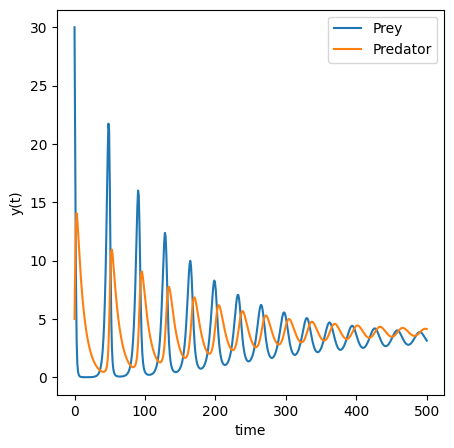

In [5]:
x1,x2=y.T

plt.plot(t,x1,label='Prey')
plt.plot(t,x2,label='Predator')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()



Often we are interested in the ‘steady-state solution’, or equilibrium points, i.e. the conditions where the system does not change anymore. One way to analyze this is by a phase plane analysis. A phase-plane diagram illustrates the state of one variable (vertical axis) versus the state of a second variable (horizontal axis). 

Now lets plot the phase plane diagram of the simulated predator-prey dynamics with the values of the Predator and Prey state variables plotted on the X and Y-axis respectively.


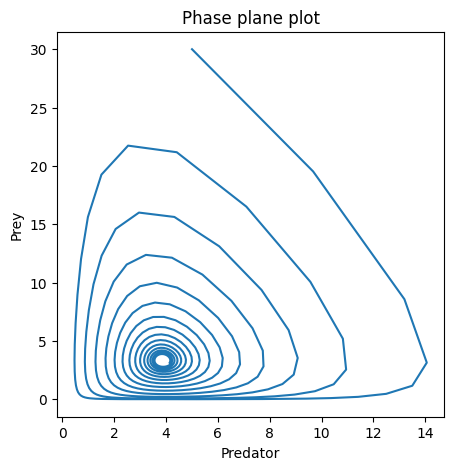

In [7]:
plt.plot(x2,x1)
plt.title('Phase plane plot')
plt.xlabel('Predator')
plt.ylabel('Prey')
plt.show()


In the above example, predator and prey populations oscillate until a stable focal point is achieved where both populations remain nearly constant. This is referred to as the equilibrium or stable focal point.

#### What happens when we change the carrying capacity of the prey population?  
K=3 and K=10000

Optional: try to plot all phase diagrams (including K=100) in a single multipanel figure. See: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

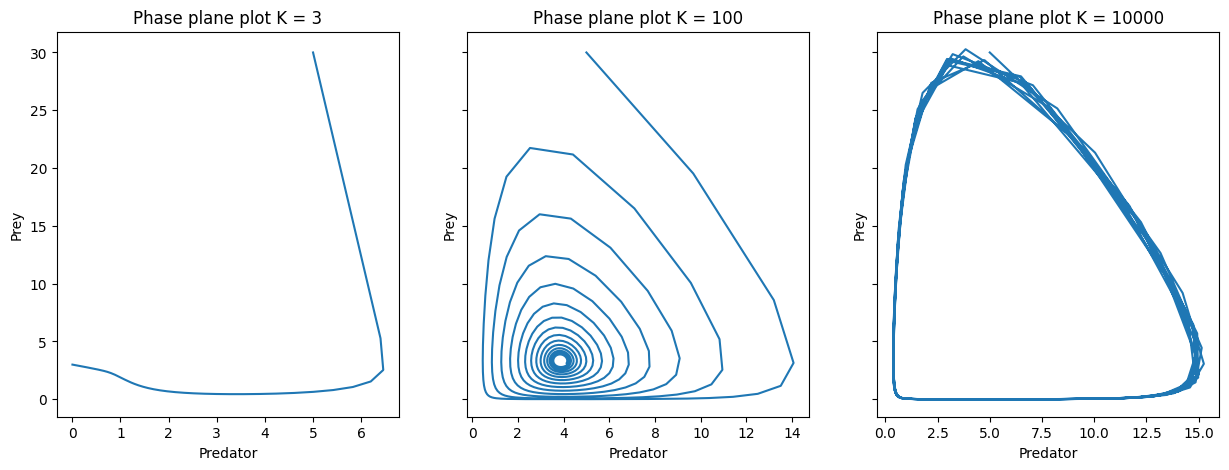

In [8]:
plt.rcParams["figure.figsize"] = (15,5) #change size of plots, https://towardsdatascience.com/change-figure-size-matplotlib-11a409f39584


test_Klist = [3,100,10000]

fig, ax = plt.subplots(1,3, sharey=True)
for K,i in zip(test_Klist,range(len(test_Klist))):
    
    parameters=(mu,K,h,b,m)

    t = np.linspace(0,500, num=500)
    y = odeint(model,X,t,args=parameters)
    x1=[i[0] for i in y]
    x2=[i[1] for i in y]




    ax[i].plot(x2,x1)
    ax[i].set_title('Phase plane plot K = '+str(K))
    ax[i].set(xlabel='Predator',ylabel='Prey')

plt.show()

From these simulations, the equilibrium or focal point seems to be around Prey=5 and Predator=4. 

We can also determine this analytically as population equilibria occur when neither populations change.  

So let's consider prey and predator derivatives = 0:  
$$ {0} = {\mu (1-{X_1 \over K}) X_1 - h X_2 X_1 } $$  
$$ {0} = {\beta  h X_1 X_2 - m X_2} $$

Solving to $X_1$ and $X_2$ results in:

$$ {X_1,eqq.} = {m \over {\beta h}} $$  
$$ {X_2,eqq.} = {\mu \over h} -  {\mu m \over \beta h^2 K}  $$

Let's calculate these equilibrium predator and prey values and compare them to the numerical simulations.

In [9]:

X1eqq=m/(b*h)
X2eqq= mu/h-(mu*m)/(b*(h**2)*K)

print('Prey equilibrium = ' +str(X1eqq) +' and predator equilibrium=' + str(X2eqq))

Prey equilibrium = 3.3333333333333335 and predator equilibrium=3.998666666666667


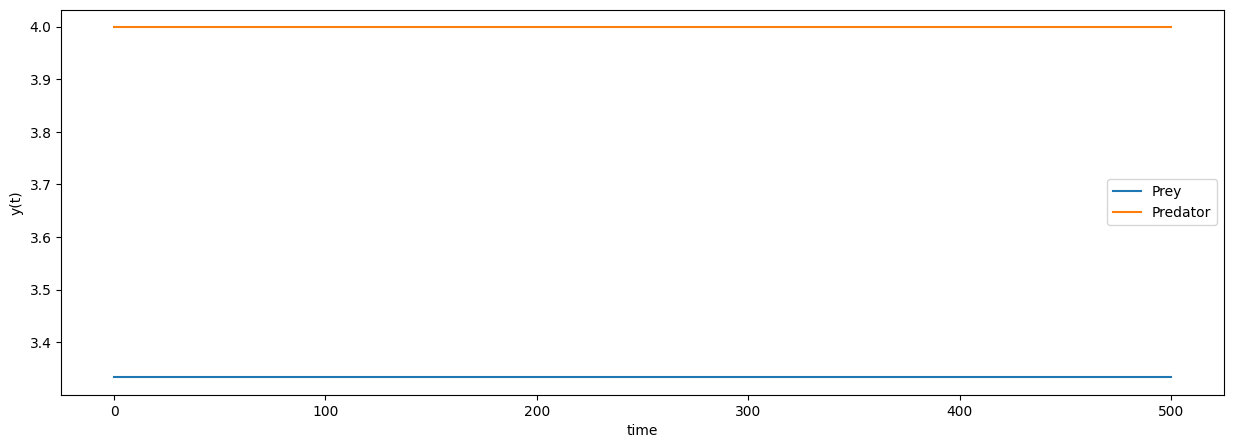

In [10]:
y = odeint(model,(X1eqq,X2eqq),t,args=parameters)
x1,x2=y.T

plt.plot(t,x1,label='Prey')
plt.plot(t,x2,label='Predator')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

3.866666666